# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [10]:
print(iris.keys())
print(iris["filename"])
print(iris.data[0:10])
print(type(iris.data))
print(iris.target_names)
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
# we only take the first two features. 
X = iris.data[:,:2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [15]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [20]:
print("target_names："+str(iris["target_names"]))

target_names：['setosa' 'versicolor' 'virginica']


In [19]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'],columns=["target"])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [22]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y],axis = 1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [25]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data
#print(iris["data"].size/len(iris['feature_names']))

150.0


## 切分訓練集與測試集
> train_test_split()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train , Y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']] ,iris_data[['target']] ,test_size = 0.2)

In [41]:
X_train.head()
#X_train.shape

,sepal length (cm),petal length (cm)
7,5.0,1.5
83,6.0,5.1
9,4.9,1.5
92,5.8,4.0
71,6.1,4.0


In [34]:
X_test.head()
X_test.shape

(20, 2)

In [35]:
Y_train.head()
Y_train.shape

(80, 1)

In [36]:
Y_test.head()
Y_test.shape

(20, 1)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [37]:
from IPython.display import Math
Math(r'X^{(i)}_{norm}=\frac{X^{(i)}-X_{min}}{X_{max}-X_{min}}')

<IPython.core.display.Math object>

In [38]:
Math(r'X^{(i)}_{std}=\frac{X^{(i)}-\mu_{X}}{\sigma_{X}}')

<IPython.core.display.Math object>

In [67]:
def norm_stats(dfs):
    minimum = dfs.min() #np.min(dfs)
    maximum = dfs.max() #np.max(dfs)
    mu = dfs.mean() #np.mean(dfs)
    sigma = dfs.std() #np.std(dfs)
    return (minimum, maximum, mu, sigma)

def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [71]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_x_train
arr_y_train = np.array(Y_train)
arr_x_train[:5]

array([[-0.7809733 , -0.89691307],
       [ 0.7693459 ,  1.53539356],
       [-0.93600522, -0.89691307],
       [ 0.45928206,  0.79218876],
       [ 0.92437782,  0.79218876]])

In [62]:
print(np.min(X_train['sepal length (cm)']))
print(np.min(X_train['petal length (cm)']))
print(np.max(X_train['sepal length (cm)']))
print(np.max(X_train['petal length (cm)']))
print(np.mean(X_train['sepal length (cm)']))
print(np.mean(X_train['petal length (cm)']))
print(np.std(X_train['sepal length (cm)']))
print(np.std(X_train['petal length (cm)']))

4.3
1.1
7.0
5.1
5.50375
2.8274999999999997
0.6409843504329882
1.470796977832087


In [63]:
print(X_train.min())
print(X_train.max())
print(X_train.mean())
print(X_train.std())

sepal length (cm)    4.3
petal length (cm)    1.1
dtype: float64
sepal length (cm)    7.0
petal length (cm)    5.1
dtype: float64
sepal length (cm)    5.50375
petal length (cm)    2.82750
dtype: float64
sepal length (cm)    0.645028
petal length (cm)    1.480077
dtype: float64


## use sklearn

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.50375 2.8275 ]
[0.64098435 1.47079698]


In [74]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.78590062, -0.90257188],
       [ 0.77419987,  1.54508068],
       [-0.94191067, -0.90257188],
       [ 0.46217977,  0.79718684],
       [ 0.93020992,  0.79718684]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [75]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-1.09792072 -0.63061049]
 [ 0.15015967  1.13713859]
 [-0.94191067 -0.97056223]
 [-1.25393077 -1.03855258]
 [-1.40994082 -0.97056223]
 [-0.00585038  0.79718684]
 [-0.94191067  0.3212544 ]
 [-1.40994082 -1.24252363]
 [-1.25393077 -0.83458154]
 [ 1.86627021  1.27311929]]


you can also use fit_transform method (i.e., fit and then transform)    

In [78]:
X_train_std = sc.fit_transform(X_train)
print(X_train_std[:10])
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.78590062 -0.90257188]
 [ 0.77419987  1.54508068]
 [-0.94191067 -0.90257188]
 [ 0.46217977  0.79718684]
 [ 0.93020992  0.79718684]
 [ 1.24223002  1.40909999]
 [ 1.39824007  1.13713859]
 [ 0.61818982  1.34110964]
 [-0.47388052 -0.97056223]
 [ 1.24223002  1.06914824]]
[[-0.88370356 -0.83360399]
 [ 0.4254869   1.14572968]
 [-0.72005475 -1.21424508]
 [-1.04735236 -1.2903733 ]
 [-1.21100117 -1.21424508]
 [ 0.26183809  0.76508859]
 [-0.72005475  0.23219107]
 [-1.21100117 -1.51875795]
 [-1.04735236 -1.06198864]
 [ 2.22562377  1.29798612]]


In [77]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 0.9999999999999999


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.457363609205366
30.065511034709743


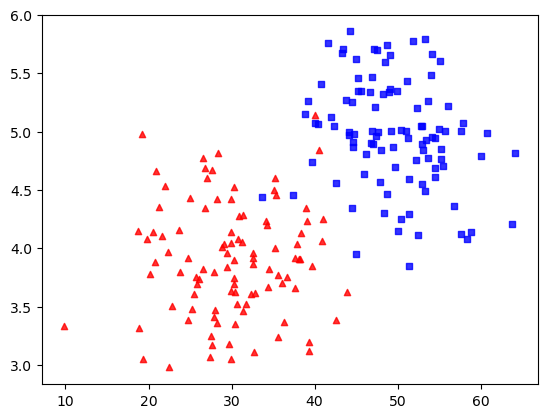

In [79]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [81]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [82]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [83]:
minmax_norm(x_val[:10])

array([0.29014619, 0.        , 0.57056029, 0.64964596, 0.56519625,
       0.90187019, 0.85494164, 0.37224524, 0.45142967, 1.        ])

In [85]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1) # 1D 變 2D。reshape((a, b)) 的意思是將陣列重排，變成只有 a個 row 和 b 個 column 的矩陣。如果 a 或 b 代入 -1 代表不指定，即讓程式自己排列並決定 row 或 column 的數目。
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200, 1)
(200, 1)
[64.15698154]
[[0.56210856]
 [0.43896605]
 [0.68112061]
 [0.71468579]
 [0.67884404]
 [0.82173363]
 [0.80181644]
 [0.59695266]
 [0.63055975]
 [0.86338143]]
